In [1]:
from utils.base_data_handler import BaseDataHandler

california_handler = BaseDataHandler(path='2025-12-04/datasets/california_housing_clean.csv')
california_handler.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6505 entries, 0 to 6504
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   med_inc           6505 non-null   float64
 1   house_age         6505 non-null   float64
 2   ave_rooms         6505 non-null   float64
 3   ave_bedrms        6505 non-null   float64
 4   population        6505 non-null   float64
 5   ave_occup         6505 non-null   float64
 6   latitude          6505 non-null   float64
 7   longitude         6505 non-null   float64
 8   med_house_val     6505 non-null   float64
 9   dist_to_coast     6505 non-null   float64
 10  lat_per_lon       6505 non-null   float64
 11  inc_per_occup     6505 non-null   float64
 12  rooms_per_age     6505 non-null   float64
 13  rooms_per_capita  6505 non-null   float64
dtypes: float64(14)
memory usage: 711.6 KB


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

target = "med_house_val"
dropped_features = [target,"med_inc"]

X = california_handler.df.drop(dropped_features, axis=1)
y = california_handler.df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("RMSE:", root_mean_squared_error(y_test, y_pred))

RMSE: 0.34453551476083594


Training Samples: 5204
Test Samples: 1301
Best n_estimators from CV: 45

--- Report Finale (Test Set) ---
Real RMSE: 0.3253


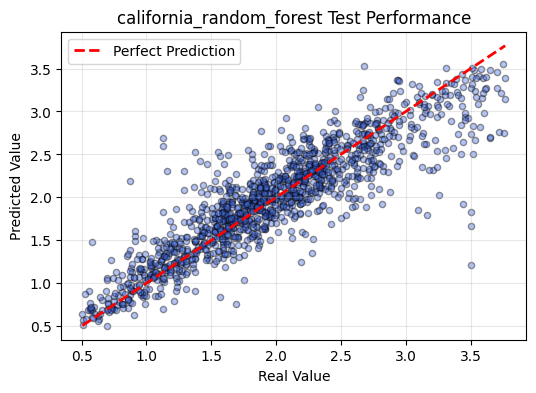

In [ ]:
from utils import functions
import xgboost as xgb

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")

# wrap training and test sets in DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# base parameters (GPU training)
params = {
    "objective": "reg:squarederror",
    "tree_method": "hist",   # unified tree method
    "device": "cuda",        # request GPU
    "random_state": 42,
}

# perform cross-validation with XGBoost's native CV
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,          # upper bound for n_estimators
    nfold=5,                      # number of tests split
    metrics="rmse",
    early_stopping_rounds=10,     # stop after x trains if no improvements
    seed=42,                      # always 42
    verbose_eval=False            # prints progress
)

# best number of boosting rounds
best_n_estimators = len(cv_results)
print(f"Best n_estimators from CV: {best_n_estimators}")

# train final model with best n_estimators
best_xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=best_n_estimators
)

# predict on test set
y_pred = best_xgb_model.predict(dtest)

# evaluate
rmse = root_mean_squared_error(y_test, y_pred)
print("\n--- Report Finale (Test Set) ---")
print(f"Real RMSE: {rmse:.4f}")

fig, ax = functions.get_prediction_graph({'california_random_forest':(None,y_pred)}, y_test=y_test)


In [4]:
from utils.base_data_handler import BaseDataHandler

melbourne_handler = BaseDataHandler('2025-12-04/datasets/Melbourne_housing_clean.csv')

Training Samples: 14895
Test Samples: 3724
Best n_estimators from CV: 58

--- Report Finale (Test Set) ---
Real RMSE: 262813.1505


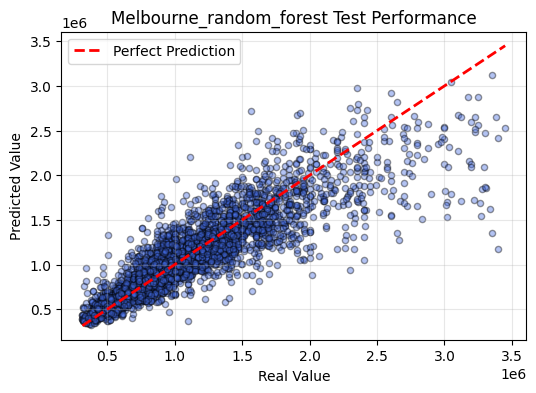

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X, y = melbourne_handler.get_training_data(target='price', log=True)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")

# wrap training and test sets in DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# base parameters (GPU training)
params = {
    "objective": "reg:squarederror",
    "tree_method": "hist",   # unified tree method
    "device": "cuda",        # request GPU
    "random_state": 42,
}

# perform cross-validation with XGBoost's native CV
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,          # upper bound for n_estimators
    nfold=5,                      # number of tests split
    metrics="rmse",
    early_stopping_rounds=10,     # stop after x trains if no improvements
    seed=42,                      # always 42
    verbose_eval=False            # prints progress
)

# best number of boosting rounds
best_n_estimators = len(cv_results)
print(f"Best n_estimators from CV: {best_n_estimators}")

# train final model with best n_estimators
best_xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=best_n_estimators
)

# predict on test set
y_pred = best_xgb_model.predict(dtest)

import numpy as np
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)
# evaluate
rmse = root_mean_squared_error(y_test, y_pred)
print("\n--- Report Finale (Test Set) ---")
print(f"Real RMSE: {rmse:.4f}")

fig, ax = functions.get_prediction_graph({'Melbourne_random_forest':(None,y_pred)}, y_test=y_test)


In [6]:
from utils.base_data_handler import BaseDataHandler

gas_cars_handler = BaseDataHandler('2025-12-04/datasets/gas_cars_2025_cleaned.csv')
gas_cars_handler.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_names  780 non-null    object 
 1   cars_names     780 non-null    object 
 2   engines        780 non-null    object 
 3   horsepower     780 non-null    float64
 4   total_speed    780 non-null    float64
 5   performance    780 non-null    float64
 6   cars_prices    780 non-null    float64
 7   fuel_types     780 non-null    object 
 8   seats          780 non-null    float64
 9   torque         780 non-null    float64
 10  engine_cc      780 non-null    float64
dtypes: float64(7), object(4)
memory usage: 67.2+ KB


In [7]:
import pandas as pd
gas_cars_handler.df = pd.get_dummies(gas_cars_handler.df, columns=["company_names", "fuel_types"], drop_first=False)

# Step 2: keep only numeric columns
gas_cars_handler.df.drop(columns=["cars_names", "engines"], inplace= True)
gas_cars_handler.df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   horsepower                       780 non-null    float64
 1   total_speed                      780 non-null    float64
 2   performance                      780 non-null    float64
 3   cars_prices                      780 non-null    float64
 4   seats                            780 non-null    float64
 5   torque                           780 non-null    float64
 6   engine_cc                        780 non-null    float64
 7   company_names_Acura              780 non-null    bool   
 8   company_names_Aston Martin       780 non-null    bool   
 9   company_names_Audi               780 non-null    bool   
 10  company_names_Bmw                780 non-null    bool   
 11  company_names_Cadillac           780 non-null    bool   
 12  company_names_Chevrole

Training Samples: 624
Test Samples: 156
Best n_estimators from CV: 23

--- Report Finale (Test Set) ---
Real RMSE: 13309.3077


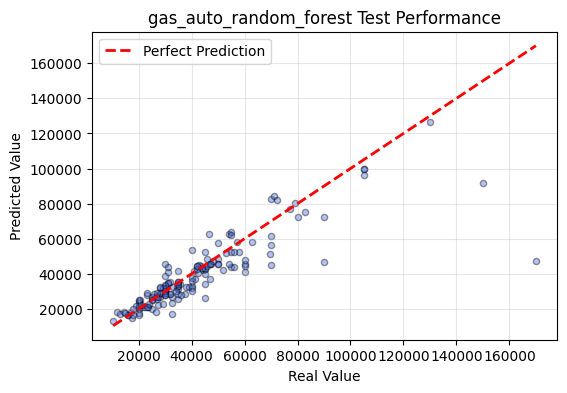

In [ ]:
from utils import functions
import xgboost as xgb

X, y = gas_cars_handler.get_training_data(target='cars_prices', log=True)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")

# wrap training and test sets in DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# base parameters (GPU training)
params = {
    "objective": "reg:squarederror",
    "tree_method": "hist",   # unified tree method
    "device": "cuda",        # request GPU
    "random_state": 42,
}

# perform cross-validation with XGBoost's native CV
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,          # upper bound for n_estimators
    nfold=5,                      # number of tests split
    metrics="rmse",
    early_stopping_rounds=10,     # stop after x trains if no improvements
    seed=42,                      # always 42
    verbose_eval=False            # prints progress
)

# best number of boosting rounds
best_n_estimators = len(cv_results)
print(f"Best n_estimators from CV: {best_n_estimators}")

# train final model with best n_estimators
best_xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=best_n_estimators
)

# predict on test set
y_pred = best_xgb_model.predict(dtest)
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

# evaluate
rmse = root_mean_squared_error(y_test, y_pred)
print("\n--- Report Finale (Test Set) ---")
print(f"Real RMSE: {rmse:.4f}")

fig, ax = functions.get_prediction_graph({'gas_auto_random_forest':(None,y_pred)}, y_test=y_test)
